In [0]:
import torch
from torch.autograd import Variable
import torch.nn.functional as F
import torch.utils.data as Data

import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np
import imageio
import pandas as pd
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression, Lasso, Ridge, HuberRegressor
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, explained_variance_score, mean_squared_log_error, mean_tweedie_deviance
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn import datasets, linear_model
import statsmodels.api as sm
from scipy import stats
from sklearn.pipeline import Pipeline
from sklearn.base import clone
import seaborn as sns
import pandas as pd
from sklearn.preprocessing import StandardScaler
import torch.optim as optim
from tqdm import tqdm
import torch
from torch.autograd import Variable
import torch.nn.functional as F
import torch.nn as nn
import torch.utils.data as Data

import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np
import imageio
import pandas as pd
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression, Lasso, Ridge, HuberRegressor
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, \
        explained_variance_score, mean_squared_log_error, mean_tweedie_deviance
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn import datasets, linear_model
import statsmodels.api as sm
from scipy import stats
from sklearn.pipeline import Pipeline
from sklearn.base import clone
import seaborn as sns
import pandas as pd
from sklearn.preprocessing import StandardScaler
import torch.optim as optim
from tqdm import tqdm
from sklearn.metrics import make_scorer
from itertools import permutations, combinations
import scipy.special
import random
import math

In [0]:
COLUMNS_FEATURES =  [
  'var_middle_number', 'this_find_number',
  'string_concat_number', 'instance_of_number',
  'method_chain_number', 'var_decl_diff_number_11', 
  'var_decl_diff_number_7', 'var_decl_diff_number_5', 
  'super_method_call_number', 'force_type_cast_number',
  'entropy', 'halstead volume', 'ncss_lightweight',
  'left_spaces_var','right_spaces_var','max_left_diff_spaces',
  'max_right_diff_spaces', 'asserts_number', 'setter_number',
  'empty_rethrow_number', 'prohibited_class_names_number',
  'return_in_if_number', 'impl_multi_number',
  'many_prim_ctors_number','multiple_try_number',
  'non_final_field_number','null_check_number',
  'part_sync_number','red_catch_number',
  'return_null_number'
]

ONLY_PATTERNS = ['var_middle_number', 'this_find_number','string_concat_number', 'instance_of_number',
'method_chain_number', 'var_decl_diff_number_11', 'var_decl_diff_number_7', 'var_decl_diff_number_5', 
'super_method_call_number', 'force_type_cast_number','asserts_number', 'setter_number', 'empty_rethrow_number', 
'prohibited_class_names_number', 'return_in_if_number', 'impl_multi_number',
'many_prim_ctors_number','multiple_try_number', 'non_final_field_number','null_check_number', 
'part_sync_number','red_catch_number', 'return_null_number']


FEATURES_NUMBER = len(ONLY_PATTERNS)
FEATURES_NUMBER

23

In [0]:
scale_ncss=False
scale=False
# import and initialize dataset
df = pd.read_csv('dataset8.csv')
df = df.dropna().drop_duplicates(subset=df.columns.difference(['filename']))
df = df[(df.ncss_lightweight > 20) & (df.ncss_lightweight < 100) & (df.npath_method_avg < 100000.00) & (df.cyclo < 50) & (df.cyclo > 4)].copy().reset_index()
df.rename(columns = {'for_type_cast_number':'force_type_cast_number'}, inplace = True) 
df = df[~df["filename"].str.lower().str.contains("test")]
filename_with_index = df['filename']
df.drop('filename', axis=1, inplace=True)
df.drop('index', axis=1, inplace=True)
Y = df[['cyclo']].copy().values
if scale_ncss:
    new = pd.DataFrame(df[ONLY_PATTERNS].values / df['ncss_lightweight'].values.reshape((-1, 1)))
else:
    new = df[ONLY_PATTERNS].copy()
if scale:
  X = pd.DataFrame(StandardScaler().fit_transform(new.values), columns=new.columns, index=new.index).values
else:
  X = new

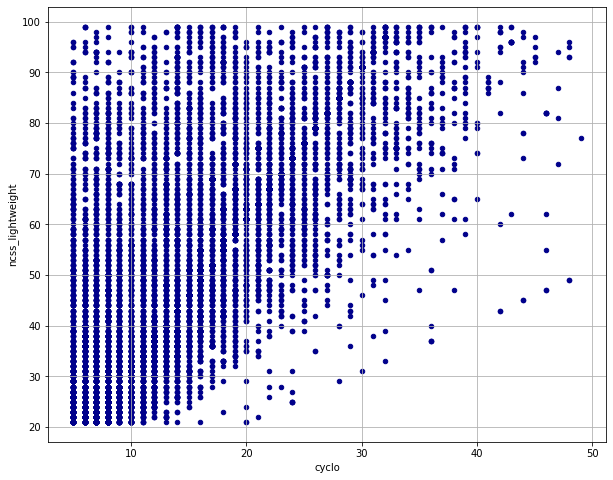

In [0]:
df.plot.scatter(x='cyclo', y='ncss_lightweight', c='DarkBlue', figsize=(10,8), grid=True)

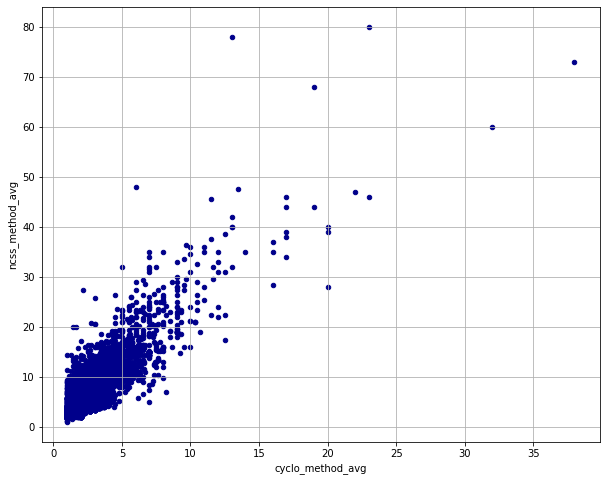

In [0]:
df.plot.scatter(x='cyclo_method_avg', y='ncss_method_avg', c='DarkBlue', figsize=(10,8), grid=True)

In [0]:
indices = X.index.values.tolist()
perm = permutations(indices, 2)

# Find the number of permutations which is the closest to the input data

In [0]:
matrix = []
def to_bool(s):
    return 1 if s else 0
    
def calc_closest_dataset_size_using_permutation(dataset_size):
  # since we have n*(n-1) options, we can sqrt and find the closest number
  return int(math.sqrt(dataset_size))

Some tests for the mentioned function

In [0]:
calc_closest_dataset_size_using_permutation(2)

1

In [0]:
calc_closest_dataset_size_using_permutation(3), calc_closest_dataset_size_using_permutation(10), calc_closest_dataset_size_using_permutation(40), calc_closest_dataset_size_using_permutation(7945), calc_closest_dataset_size_using_permutation(498000), calc_closest_dataset_size_using_permutation(54515)

(1, 3, 6, 89, 705, 233)

In [0]:
# REPLACE WITH PERMUTATIONS! 

In [0]:
print(scipy.special.perm(1, 2), scipy.special.perm(2, 2), scipy.special.perm(3, 2))
# print(perm(4, 2), perm(5, 2), perm(6, 2), perm(7, 2))
# print(perm(88, 2), perm(89, 2) , perm(90, 2))
# print(perm(705, 2), perm(706, 2), perm(707, 2))
# print(perm(232, 2), perm(233, 2), perm(234, 2))

0.0 2.0 6.0


In [0]:
def generate_full_permutations_dataset(d, desired_dataset_size, filename="out.csv"):
  indices = []
  real_patterns_number = calc_closest_dataset_size_using_permutation(desired_dataset_size)
  print('You set {} values for dataset, but since we have permutations, we will get only dataset with {} size due to pairwise comparison between each pattern'.format(desired_dataset_size, real_patterns_number))
  random_indices = random.sample(d.index.tolist(), real_patterns_number)
  perms = permutations(random_indices, 2)
  lst = list(perms)
  matrix = []
  for _, val in tqdm(enumerate(lst), total=len(lst)):
    # print(_)
    x, y = val[0], val[1]
    # print(x, y)
    # print(iter)
    left_patterns = d.loc[x, :].values.tolist()
    right_patterns = d.loc[y, :].values.tolist()
    row = left_patterns + right_patterns
    # print(row)
    target_left = df.loc[x, :]['cyclo']
    target_right = df.loc[y, :]['cyclo']
    target_cyclo = to_bool(target_left < target_right)
    matrix.append(row + [target_cyclo])
    # iter += 1
    import csv

  with open(filename, "w", newline="") as f:
      writer = csv.writer(f)
      writer.writerows(matrix)

In [0]:
generate_full_permutations_dataset(X, 10000)

  1%|          | 81/9900 [00:00<00:12, 805.49it/s]

You set 10000 values for dataset, but since we have permutations, we will get only dataset with 100 size due to pairwise comparison between each pattern


100%|██████████| 9900/9900 [00:10<00:00, 982.89it/s] 


In [0]:
dataset = pd.read_csv('out.csv', header=None)
dataset.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,5,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6,0,0,0,0,6,0,1,2,0,0,3,3,0,3,0,0,0,1,0,0,0,0,0,3,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,5,0,0,4,1


# Random Forest without metrics

In [0]:
from sklearn.ensemble import RandomForestClassifier

def train(dataset):
  newd = dataset.drop_duplicates(keep=False)
  y = newd.iloc[:,-1]
  X = newd.iloc[:,:-1]
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

  rfc=RandomForestClassifier(random_state=42)
  param_grid = { 
      'n_estimators': [200, 500],
      'max_features': ['auto', 'sqrt', 'log2'],
      'max_depth' : [4,5,6,7,8],
      'criterion' :['gini', 'entropy']
  }

  CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5)
  CV_rfc.fit(X_train, y_train)
  print(CV_rfc.best_params_)
  print('Training best model')
  rfc1=RandomForestClassifier(**CV_rfc.best_params_)
  rfc1.fit(X_train, y_train)
  pred=rfc1.predict(X_test)
  from sklearn.metrics import accuracy_score, auc, f1_score, hamming_loss
  # print("Accuracy for Random Forest on CV data: ", accuracy_score(y_test,pred))
  # print("f1_score for Random Forest on CV data: ", f1_score(y_test,pred))
  # print("hamming_loss for Random Forest on CV data: ", hamming_loss(y_test,pred))
  # print("auc for Random Forest on CV data: ", auc(y_test,pred))
  return  X_train, X_test, y_train, y_test, pred, rfc1

In [0]:
d_generated = pd.read_csv('out.csv')
X_train, X_test, y_train, y_test, pred, rfc1 = train(d_generated)

{'criterion': 'gini', 'max_depth': 8, 'max_features': 'auto', 'n_estimators': 200}
Training best model


In [0]:
  # from sklearn.metrics import accuracy_score, auc, f1_score, hamming_loss, precision
  # print("Accuracy for Random Forest on CV data: ", accuracy_score(y_test,pred))
  # print("f1_score for Random Forest on CV data: ", f1_score(y_test,pred))
  # print("hamming_loss for Random Forest on CV data: ", hamming_loss(y_test,pred))
  # print("hamming_loss for Random Forest on CV data: ", precision(y_test,pred))
  # print("auc for Random Forest on CV data: ", auc(y_test,pred))
  
  predictions = rfc1.predict(X_test)
  classification_report(y_test, predictions)
  print('''precision    recall  f1-score   support

           0       0.81      0.79      0.80       808
           1       0.77      0.80      0.78       712

    accuracy                           0.79      1520
   macro avg       0.79      0.79      0.79      1520
weighted avg       0.79      0.79      0.79      1520
'
  ''')

precision    recall  f1-score   support

         0       0.81      0.79      0.80       808
         1       0.77      0.80      0.78       712

  accuracy                           0.79      1520
 macro avg       0.79      0.79      0.79      1520
weighted avg       0.79      0.79      0.79      1520
'



In [0]:
from itertools import chain, tee

import networkx
import networkx.algorithms

# pairwise recipe from the itertools docs.
def pairwise(iterable):
    "s -> (s0,s1), (s1,s2), (s2, s3), ..."
    a, b = tee(iterable)
    next(b, None)
    return zip(a, b)

def merge_ordering(sublists):
    # Make an iterator of graph edges for the new graph. Some edges may be repeated.
    # That's fine. NetworkX will ignore duplicates.
    edges = chain.from_iterable(map(pairwise, sublists))
    graph = networkx.DiGraph(edges)
    # networkx.draw(graph, with_labels=True, font_weight='bold')
    return list(networkx.algorithms.topological_sort(graph))

In [0]:
import networkx as nx
from collections import defaultdict, OrderedDict


def test_input_proba(arr, model):
  # print("You must pass parameter in the following order: {}".format(COLUMNS_FEATURES))
  changed_arrs = []
  for i, item in enumerate(arr):
    # print(item)
    elem = arr[i]
    if elem <= 0:
      continue
    else:
      arr_new = arr.copy()
      arr_new[i] = arr[i] - 1
      changed_arrs.append([i, arr_new])
  
  orders = []
  # print('Making graph for partial ordered list')
  # print(changed_arrs)
  for elem1, elem2 in combinations(changed_arrs, 2):
    input_data = [elem1[1] + elem2[1]]
    # print(input_data, '*************')
    pred = model.predict(input_data)
    if pred == 1:
      # elem1 < elem2
      orders.append([elem1[0], elem2[0]])
    else:
      orders.append([elem2[0], elem1[0]])

  res_arr = {}
  for i, x in changed_arrs:
    input_data = [arr + x]
    pred = model.predict_proba(input_data)[:, 1]
    res_arr[i] = pred
    print(arr, x, pred)
  
  sorted_res = OrderedDict(sorted(res_arr.items(), key=lambda x: x[0]))
  print(sorted_res)
  return sorted_res.keys()


def test_input(arr, model):
  # print("You must pass parameter in the following order: {}".format(COLUMNS_FEATURES))
  changed_arrs = []
  for i, item in enumerate(arr):
    # print(item)
    elem = arr[i]
    if elem <= 0:
      continue
    else:
      arr_new = arr.copy()
      arr_new[i] = arr[i] - 1
      changed_arrs.append([i, arr_new])
  
  orders = []
  preds = defaultdict(dict)
  # print('Making graph for partial ordered list')
  # print(changed_arrs)
  for elem1, elem2 in combinations(changed_arrs, 2):
    index_1 = elem1[0]
    index_2 = elem2[0]
    input_data = [elem1[1] + elem2[1]]
    # print(input_data)
    pred_p = model.predict_proba(input_data)
    pred = model.predict(input_data)
    if pred == 1:
      # elem1 < elem2
      print([elem1[0], elem2[0]], pred, pred_p)
      orders.append([elem1[0], elem2[0]])
    else:
      orders.append([elem2[0], elem1[0]])
      print([elem2[0], elem1[0]], pred, pred_p)

  # print(orders)
  try:
    res = merge_ordering(orders)
    return res
  except nx.NetworkXUnfeasible as e:
    return 0


In [0]:
test_val = df[ONLY_PATTERNS].loc[1, :].tolist()
test_val

[6, 0, 2, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 6, 5, 0, 0, 1]

In [0]:
from sklearn import datasets, svm
out_metrics = pd.read_csv('out.csv')
svc_best = svm.SVC(**{'C': 1000, 'gamma': 0.001, 'kernel': 'rbf', 'probability': True})

In [0]:
d1 = out_metrics.drop_duplicates(keep=False)
y4 = d1.iloc[:,-1]
X4 = d1.iloc[:,:-1]
X_train4, X_test4, y_train4, y_test4 = train_test_split(X4, y4, test_size=0.3)

In [0]:
svc_best.fit(X_train4, y_train4)

SVC(C=1000, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

In [0]:
svc_best.predict([[6, 0, 2, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 6, 5, 0, 0, 1] + [5, 0, 2, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 6, 5, 0, 0, 1]])

array([1])

In [0]:
svc_best.predict_proba([[6, 0, 2, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 6, 5, 0, 0, 1] + [5, 0, 2, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 6, 5, 0, 0, 1]])

array([[0.26549303, 0.73450697]])

In [297]:
test_input(test_val, svc_best)

[2, 0] [0] [[0.93296653 0.06703347]]
[0, 6] [1] [[0.0503459 0.9496541]]
[7, 0] [0] [[9.99764649e-01 2.35350590e-04]]
[14, 0] [0] [[0.69361642 0.30638358]]
[18, 0] [0] [[0.96051589 0.03948411]]
[19, 0] [0] [[0.98860139 0.01139861]]
[22, 0] [0] [[0.8389017 0.1610983]]
[2, 6] [1] [[0.00642647 0.99357353]]
[7, 2] [0] [[0.99794672 0.00205328]]
[2, 14] [1] [[0.20276339 0.79723661]]
[18, 2] [0] [[0.72319984 0.27680016]]
[19, 2] [0] [[0.90713925 0.09286075]]
[2, 22] [1] [[0.37764363 0.62235637]]
[7, 6] [0] [[9.99994048e-01 5.95156449e-06]]
[14, 6] [0] [[0.98823682 0.01176318]]
[18, 6] [0] [[0.99889258 0.00110742]]
[19, 6] [0] [[9.99695706e-01 3.04293640e-04]]
[22, 6] [0] [[0.99482182 0.00517818]]
[7, 14] [1] [[1.53504364e-05 9.99984650e-01]]
[7, 18] [1] [[0.02371049 0.97628951]]
[7, 19] [1] [[0.08546934 0.91453066]]
[7, 22] [1] [[0.00502631 0.99497369]]
[18, 14] [0] [[0.93304176 0.06695824]]
[19, 14] [0] [[0.98143648 0.01856352]]
[22, 14] [0] [[0.75633994 0.24366006]]
[19, 18] [0] [[0.91009862

[7, 19, 18, 2, 22, 14, 0, 6]

In [300]:
test_input_proba(test_val, svc_best)

[6, 0, 2, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 6, 5, 0, 0, 1] [5, 0, 2, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 6, 5, 0, 0, 1] [0.73450697]
[6, 0, 2, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 6, 5, 0, 0, 1] [6, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 6, 5, 0, 0, 1] [0.37648358]
[6, 0, 2, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 6, 5, 0, 0, 1] [6, 0, 2, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 6, 5, 0, 0, 1] [0.99339228]
[6, 0, 2, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 6, 5, 0, 0, 1] [6, 0, 2, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 6, 5, 0, 0, 1] [0.00186992]
[6, 0, 2, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 6, 5, 0, 0, 1] [6, 0, 2, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 6, 5, 0, 0, 1] [0.78368845]
[6, 0, 2, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 6, 5, 0, 0, 1] [6, 0, 2, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 5, 5, 0, 0, 1] [0.25630925]
[6, 0, 2, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 6, 5, 0, 0, 1] [6, 0, 2, 0,

odict_keys([0, 2, 6, 7, 14, 18, 19, 22])

In [0]:
errors = set()
good_vals = set()
arr = []

for x in d_generated.iterrows():
  arr.append(test_input(test_val, svc_best))

print(arr)
[x for x in arr if x == 1]


In [0]:
[x for x in arr if x == 1]

[]

In [0]:
len(arr)

9899

# RF. Large DATASET without metrics

In [0]:
scale_ncss=False
scale=False
# import and initialize dataset
df = pd.read_csv('dataset8.csv')
df = df.dropna().drop_duplicates(subset=df.columns.difference(['filename']))
df = df[(df.ncss_lightweight > 20) & (df.ncss_lightweight < 100) & (df.npath_method_avg < 100000.00) & (df.cyclo < 50) & (df.cyclo > 4)].copy().reset_index()
df.rename(columns = {'for_type_cast_number':'force_type_cast_number'}, inplace = True) 
df = df[~df["filename"].str.lower().str.contains("test")]
filename_with_index = df['filename']
df.drop('filename', axis=1, inplace=True)
df.drop('index', axis=1, inplace=True)
Y_m = df[['cyclo']].copy().values
if scale_ncss:
    new = pd.DataFrame(df[ONLY_PATTERNS].values / df['ncss_lightweight'].values.reshape((-1, 1)))
else:
    new = df[ONLY_PATTERNS].copy()
if scale:
  X_m = pd.DataFrame(StandardScaler().fit_transform(new.values), columns=new.columns, index=new.index).values
else:
  X_m = new

In [0]:
generate_full_permutations_dataset(X_m, 500000, filename='out_m.csv')

In [0]:
dataset1 = pd.read_csv('out_m.csv', header=None)
dataset1.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46
0,5,0,0,0,0,0,0,4,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,5,0,0,0,2,2,3,6,0,0,0,0,0,0,1,0,0,1,0,1,0,0,1,0
1,5,0,0,0,0,0,0,4,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,4,0,0,0,0
2,5,0,0,0,0,0,0,4,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,1,0,3,0,2,0,1,2,1,0,0,0,0,0,1,0,0,0,1,2,0,0,0,0
3,5,0,0,0,0,0,0,4,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,7,0,0,0,0,0,0,3,0,0,0,0,0
4,5,0,0,0,0,0,0,4,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,1,0,4,0,2,0,0,0,1,0,0,0,0,0,0,0,0,0,6,0,0,0,0,0


In [0]:
X_train1, X_test1, y_train1, y_test1, pred1, rfc_m = train(dataset)

{'criterion': 'gini', 'max_depth': 8, 'max_features': 'auto', 'n_estimators': 500}
Training best model


In [0]:
  from sklearn.metrics import accuracy_score, auc, f1_score, hamming_loss
  print("Accuracy for Random Forest on CV data: ", accuracy_score(y_test1,pred1))
  print("f1_score for Random Forest on CV data: ", f1_score(y_test1,pred1))
  print("hamming_loss for Random Forest on CV data: ", hamming_loss(y_test1,pred1))

Accuracy for Random Forest on CV data:  0.7809397749834547
f1_score for Random Forest on CV data:  0.7440061871616396
hamming_loss for Random Forest on CV data:  0.21906022501654535


# SVM. DATASET without metrics

In [0]:
scale_ncss=False
scale=False
# import and initialize dataset
df = pd.read_csv('dataset8.csv')
df = df.dropna().drop_duplicates(subset=df.columns.difference(['filename']))
df = df[(df.ncss_lightweight > 20) & (df.ncss_lightweight < 100) & (df.npath_method_avg < 100000.00) & (df.cyclo < 50) & (df.cyclo > 4)].copy().reset_index()
df.rename(columns = {'for_type_cast_number':'force_type_cast_number'}, inplace = True) 
df = df[~df["filename"].str.lower().str.contains("test")]
filename_with_index = df['filename']
df.drop('filename', axis=1, inplace=True)
df.drop('index', axis=1, inplace=True)
Y_metrics = df[['cyclo']].copy().values
if scale_ncss:
    new = pd.DataFrame(df[COLUMNS_FEATURES].values / df['ncss_lightweight'].values.reshape((-1, 1)))
else:
    new = df[COLUMNS_FEATURES].copy()
if scale:
  X_metrics = pd.DataFrame(StandardScaler().fit_transform(new.values), columns=new.columns, index=new.index).values
else:
  X_metrics = new

In [0]:
generate_full_permutations_dataset(X_m, 10000, filename='out_metrics.csv')

In [0]:
out_metrics = pd.read_csv('out.csv')

In [0]:
import numpy as np
from sklearn import datasets, svm
import matplotlib.pyplot as plt

parameter_candidates = [
  {'C': [1, 10, 100, 1000], 'kernel': ['linear']},
  {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001], 'kernel': ['rbf']},
]

d_temp = out_metrics.drop_duplicates(keep=False)
y2 = d_temp.iloc[:,-1]
X2 = d_temp.iloc[:,:-1]
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.3)

param_grid = { 
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}

clf_svm = GridSearchCV(estimator=svm.SVC(), param_grid=parameter_candidates, n_jobs=-1)
clf_svm.fit(X_train2, y_train2)
print(clf_svm.best_params_) 

{'C': 1000, 'gamma': 0.001, 'kernel': 'rbf'}


In [0]:
import pandas as pd 
import numpy as np 
from sklearn.metrics import classification_report, confusion_matrix 
from sklearn.datasets import load_breast_cancer 
from sklearn.svm import SVC 
from yellowbrick.classifier import ClassificationReport
from sklearn.linear_model import LogisticRegression
!pip install yellowbrick

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


0.8657894736842106

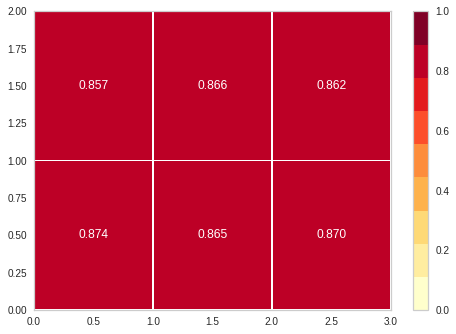

In [0]:
viz = ClassificationReport(svm.SVC(**clf_svm.best_params_), classes=['less', 'larger'])
viz.fit(X_train2, y_train2)
viz.score(X_test2, y_test2)
# viz.show()

# predictions = clf_svm.best_estimator_.predict(X_test2)
# classification_report(y_test2, predictions)

In [0]:
print('''precision    recall  f1-score   support

           0       0.87      0.87      0.87       787
           1       0.86      0.87      0.86       733

    accuracy                           0.87      1520
   macro avg       0.87      0.87      0.87      1520
weighted avg       0.87      0.87      0.87      1520
''')

precision    recall  f1-score   support

           0       0.87      0.87      0.87       787
           1       0.86      0.87      0.86       733

    accuracy                           0.87      1520
   macro avg       0.87      0.87      0.87      1520
weighted avg       0.87      0.87      0.87      1520



# NN. Dataset without metrics

In [0]:
class AibolitDataset(torch.utils.data.Dataset):
    def __init__(self):
        newd = pd.read_csv('out.csv', header=None)
        self.Y = [[x] for x in newd.iloc[:,-1].values]
        self._columns = COLUMNS_FEATURES
        self.X = newd.iloc[:,:-1].values

    def __getitem__(self, idx):
        # get item by index
        return torch.FloatTensor(self.X[idx]), torch.FloatTensor(self.Y[idx])
  
    def __len__(self):
        # returns length of data
        return len(self.X)
    
    def shape(self):
        # returns length of data
        return self.X.shape
  
    @property
    def columns(self):
        """Columns property."""
        return self._columns

In [0]:
# newd = pd.read_csv('out.csv', header=None)
yy = [[x] for x in newd.iloc[:,-1].values.astype('double', copy=False).tolist()]
# zz = newd.iloc[:,:-1].values.astype('double', copy=False)
yy

In [0]:
dataset = AibolitDataset()
print('dataset length:', dataset.shape())
len(dataset)
dataset[0]
dataset.Y[0], torch.FloatTensor(dataset.X[0])

dataset length: (9900, 46)


([0],
 tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         6., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 5., 0., 0., 0., 0.]))

In [0]:
dataset.X.shape

(9900, 46)

In [0]:
def prepare_data(dataset): 
  batch_size = 100
  train_size = int(0.7*len(dataset))
  val_size = len(dataset) - train_size
  train_data, val_data = torch.utils.data.random_split(dataset,[train_size, val_size])
  #print(len(train_data), len(val_data))
  trainloader = torch.utils.data.DataLoader(
      train_data, batch_size=batch_size,
      shuffle=True)
  testloader = torch.utils.data.DataLoader(
      val_data, batch_size=batch_size,
      shuffle=False)
  return trainloader, testloader, train_data, val_data

def prepare_data2(train_data, val_data): 
  batch_size = 100
  trainloader = torch.utils.data.DataLoader(
      train_data, batch_size=batch_size,
      shuffle=True)
  testloader = torch.utils.data.DataLoader(
      val_data, batch_size=batch_size,
      shuffle=False)
  return trainloader, testloader, train_data, val_data


In [0]:
class Maxout(nn.Module):

    def __init__(self, d_in, d_out, pool_size):
        super().__init__()
        self.d_in, self.d_out, self.pool_size = d_in, d_out, pool_size
        self.lin = nn.Linear(d_in, d_out * pool_size)


    def forward(self, inputs):
        shape = list(inputs.size())
        shape[-1] = self.d_out
        shape.append(self.pool_size)
        max_dim = len(shape) - 1
        out = self.lin(inputs)
        m, i = out.view(*shape).max(max_dim)
        return m

In [0]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):

    def __init__(self, d, max_out_pool):
        super(Net, self).__init__()
        self.f = nn.Sequential(
            Maxout(46, d, max_out_pool),
            Maxout(d, d, max_out_pool),
            #Maxout(d, d, max_out_pool),
            nn.Linear(d, 1)
            # torch.nn.Sigmoid(d)
        )

    def forward(self, x):
        return self.f(x)


In [0]:
def mean_absolute_percentage_error(y_true, y_pred):
    y_true = np.array(y_true).reshape(-1)
    y_pred = np.array(y_pred).reshape(-1)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

def print_scores(y_test, y_pred):
    print('MSE: ', mean_squared_error(y_test, y_pred))
    print('MAE: ', mean_absolute_error(y_test, y_pred))
    print('MAPE:', mean_absolute_percentage_error(y_test, y_pred))
    print('R2:  ', r2_score(y_test, y_pred))
    print('VAR:  ', np.var(y_test))

In [0]:
def proba_tobinary(pred):
  # print(pred)
  # print([[1] if x[0] > 0.5 else [0] for x in pred])
  return [[1] if x[0] > 0.5 else [0] for x in pred]

In [0]:
from sklearn.metrics import accuracy_score, auc, f1_score, hamming_loss, precision_score

def validate(model, dl, device=None):
    model.eval()
    test_loss = 0
    accuracy = 0
    preds = []
    pred_probs = []
    all_labels = []
    criterion = torch.nn.BCEWithLogitsLoss(reduction='none')
    losses = []

    with torch.no_grad():
        for inputs, labels in dl:
            # inputs, labels = inputs.to(device), labels.to(device)
            pred = model.forward(inputs)
            pred_prob = proba_tobinary(torch.nn.Sigmoid()(pred))
            # print(pred.squeeze(1), labels.squeeze(1))
            batch_loss = criterion(pred.squeeze(1), labels.squeeze(1))
            all_labels += labels.tolist()
            preds += pred.tolist()
            # print(pred_prob)
            pred_probs += pred_prob
            losses += batch_loss.tolist()

    avg_loss = np.mean(losses)
    y_true, y_pred = np.array(all_labels), np.array(pred_probs)
    acc = accuracy_score(y_true, y_pred)
    # print(type(f1_score))
    f1_sc = f1_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    hamm_loss = hamming_loss(y_true, y_pred)

    return acc, avg_loss, f1_sc, precision, hamm_loss

# device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
# validate(model, testloader, device)


In [0]:
def check_early_stoppping(early_stoping: int, score_history, epoch):
  if (len(score_history) == 0): return False
  not_improve_counter = 0
  best = score_history[0]
  for i in range(0, epoch):
    if score_history[i] < best:
      not_improve_counter = 0
      best = score_history[i]
    else:
      not_improve_counter += 1

    if not_improve_counter >= early_stoping:
      return True
  return False

In [0]:
import json

def train_model(trainloader, testloader, d, max_out_pool, device=None, early_stop=5, lr=0.002):
    EARLY_STOPING = early_stop  # if VAL score do not improves more then this amount of times
    epochs = 200
    steps = 0
    running_loss = 0
    print_every = 10
    train_losses, test_losses = [], []
    model = Net(d, max_out_pool)  # .to(device)
    optimizer = optim.Adam(model.parameters(), lr=lr)
    # optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)
    # scheduler = optim.lr_scheduler.CyclicLR(optimizer, base_lr=0.001, max_lr=0.005)
    criterion = torch.nn.BCEWithLogitsLoss()  # BCEWithLogitsLoss without sigmoid, BCELoss with sigmoid

    # device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    valid_loss_epocs = {}
    acc_epocs = {}
    f1_score_epochs = {}
    precision_epocs = {}
    train_loss_epocs = {}
    hamm_loss_epocs = {}
    best_params = None
    best_score = -200

    for epoch in range(epochs):
        model.train()
        for inputs, labels in trainloader:
            steps += 1
            # inputs, labels = inputs.to(device), labels.to(device)
            optimizer.zero_grad()
            logps = model.forward(inputs)
            loss = criterion(logps.squeeze(1), labels.squeeze(1))
            loss.backward()
            optimizer.step()
            running_loss += loss.item()
        _, train_loss, _, _, _ = validate(model, trainloader, device)
        acc, valid_loss, f1_score_val, precision, hamm_loss = validate(model, testloader, device)
        acc_epocs[epoch] = acc
        valid_loss_epocs[epoch] = valid_loss
        train_loss_epocs[epoch] = train_loss
        f1_score_epochs[epoch] = f1_score_val
        precision_epocs[epoch] = precision
        hamm_loss_epocs[epoch] = hamm_loss

        if (best_score < f1_score_val):
            torch.save(model.state_dict(), './best.params.bin')
            best_score = f1_score_val
            # print('best_score', best_score)

        if check_early_stoppping(EARLY_STOPING, f1_score_epochs, epoch):
            print('early stop training', epoch)
            break

        # scheduler.step()

    model = Net(d, max_out_pool)
    model.load_state_dict(torch.load('./best.params.bin'))
    model.eval()
    return model, acc_epocs, precision_epocs, f1_score_epochs, train_loss_epocs, hamm_loss_epocs, valid_loss_epocs, best_score

In [0]:
stats = []
for i in range(7):
  dataset = AibolitDataset()
  trainloader, testloader, train_data, val_data = prepare_data(dataset)
  model, acc_epocs, precision_epocs, f1_score_epochs, train_loss_epocs, hamm_loss_epocs, valid_loss_epocs, best_score = train_model(
      trainloader, testloader,
      d=50, max_out_pool=2,
      early_stop=7, lr=0.002)
  #print('best_score', best_score)
  stats += [best_score]

print(np.mean(stats), np.std(stats))


In [0]:
model.eval()
list(zip(['accuracy', 'avg_loss', 'f1_score', 'precision', 'hamm_loss'], validate(model, testloader)))

<class 'function'>


[('accuracy', 0.8794612794612795),
 ('avg_loss', 0.2846884584878799),
 ('f1_score', 0.8681885125184094),
 ('precision', 0.9090208172706246),
 ('hamm_loss', 0.12053872053872054)]

In [0]:
min(f1_score_epochs.values())

0.7669712793733681

In [0]:
acc_epocs

{0: 0.7595959595959596,
 1: 0.8033670033670034,
 2: 0.832996632996633,
 3: 0.836026936026936,
 4: 0.8373737373737373,
 5: 0.8565656565656565,
 6: 0.8656565656565657,
 7: 0.8730639730639731}

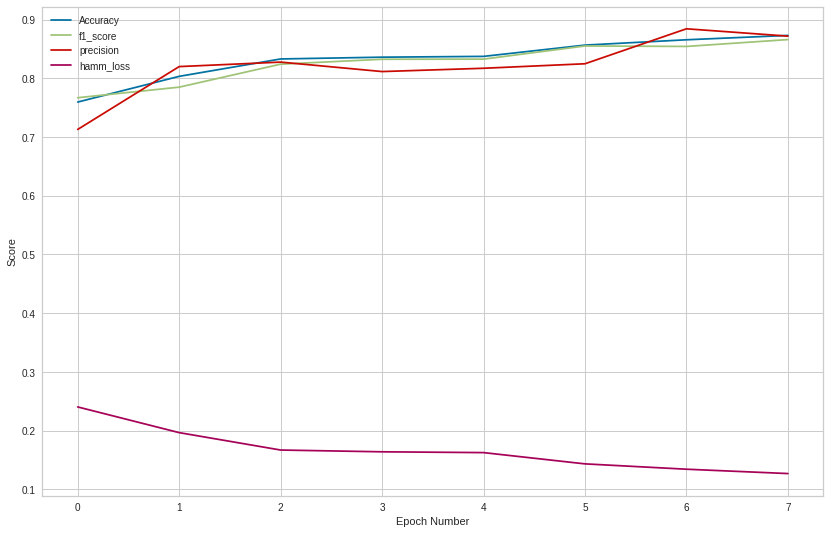

In [0]:
fig, ax = plt.subplots(figsize=(14, 9))
ax.plot(list(acc_epocs.keys()), list(acc_epocs.values()), label="Accuracy")
ax.plot(list(f1_score_epochs.keys()), list(f1_score_epochs.values()), label="f1_score")
ax.plot(list(precision_epocs.keys()), list(precision_epocs.values()), label="precision")
ax.plot(list(hamm_loss_epocs.keys()), list(hamm_loss_epocs.values()), label="hamm_loss")
plt.grid(True)
ax.set_xlabel('Epoch Number')
ax.set_ylabel('Score')
plt.legend(loc="upper left")
plt.show()
fig.savefig("Scores_NN.pdf", bbox_inches='tight')

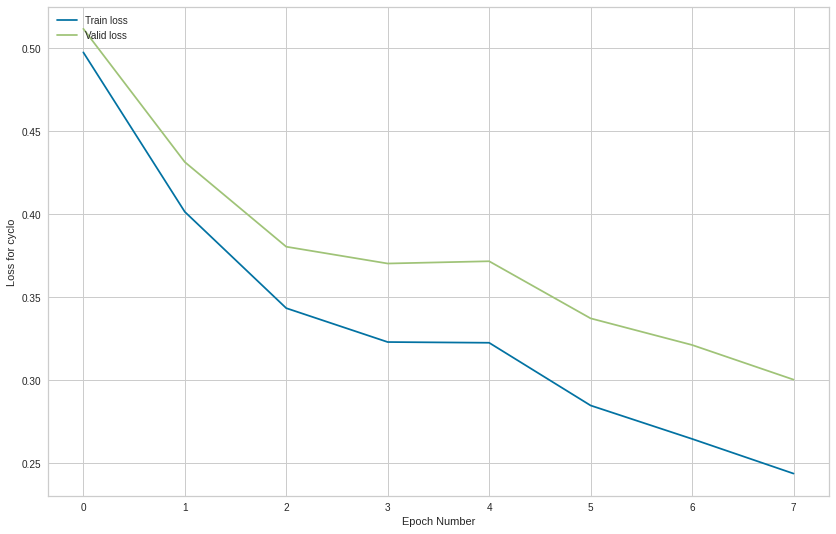

In [0]:
fig, ax = plt.subplots(figsize=(14, 9))
ax.plot(list(train_loss_epocs.keys()), list(train_loss_epocs.values()), label="Train loss")
ax.plot(list(valid_loss_epocs.keys()), list(valid_loss_epocs.values()), label="Valid loss")
plt.grid(True)
ax.set_xlabel('Epoch Number')
ax.set_ylabel('Loss for cyclo')
plt.legend(loc="upper left")
plt.show()
fig.savefig("Loss.pdf", bbox_inches='tight')

# Large Dataset NN (Draft)

In [0]:
class AibolitDatasetLarge(torch.utils.data.Dataset):
    def __init__(self):
        newd = pd.read_csv('out_m.csv', header=None)
        self.Y = [[x] for x in newd.iloc[:, -1].values]
        self.X = newd.iloc[:, :-1].values

    def __getitem__(self, idx):
        # get item by index
        return torch.FloatTensor(self.X[idx]), torch.FloatTensor(self.Y[idx])

    def __len__(self):
        # returns length of data
        return len(self.X)

    def shape(self):
        # returns length of data
        return self.X.shape

In [0]:
stats = []
for i in range(7):
  dataset = AibolitDatasetLarge()
  trainloader, testloader, train_data, val_data = prepare_data(dataset)
  model, acc_epocs, precision_epocs, f1_score_epochs, train_loss_epocs, hamm_loss_epocs, valid_loss_epocs, best_score = train_model(
      trainloader, testloader,
      d=50, max_out_pool=2,
      early_stop=7, lr=0.002)
  #print('best_score', best_score)
  stats += [best_score]

print(np.mean(stats), np.std(stats))

In [0]:
model.predict()